In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Import our custom script from src
sys.path.append(os.path.abspath('../'))
from src.processing import merge_with_geo

# Load data [cite: 25, 40]
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# 1. Data Cleaning [cite: 113-116]
# Handle missing values: Check for nulls first 
print("Missing values before cleaning:\n", fraud_df.isnull().sum())
# Note: Usually, Fraud_Data is clean, but if nulls exist, we drop them to ensure data quality.
fraud_df.dropna(inplace=True)

fraud_df.drop_duplicates(inplace=True) # [cite: 115]
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time']) # [cite: 116]
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time']) # [cite: 116]

# 2. Geolocation Merge [cite: 123]
# Ensure you have the ip_to_int logic in your src/processing.py
fraud_df = merge_with_geo(fraud_df, ip_df)

print(f"Data shape after merge: {fraud_df.shape}")

Missing values before cleaning:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Data shape after merge: (151112, 14)


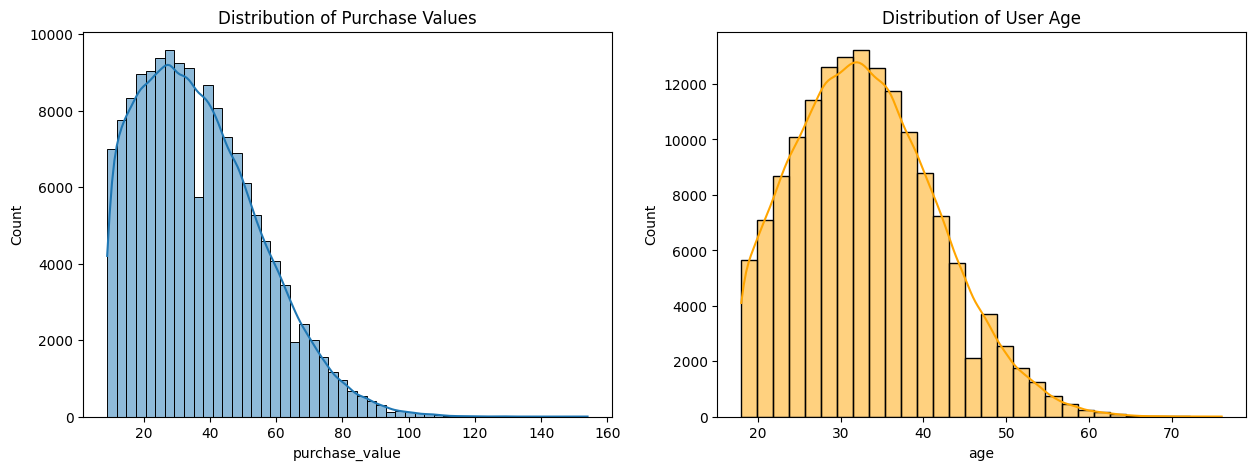

In [2]:
# Create a figure with two subplots 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Purchase Value Distribution
sns.histplot(fraud_df['purchase_value'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Purchase Values')

# Age Distribution
sns.histplot(fraud_df['age'], bins=30, ax=axes[1], kde=True, color='orange')
axes[1].set_title('Distribution of User Age')

plt.show()

Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Fraud Percentage: 9.36%


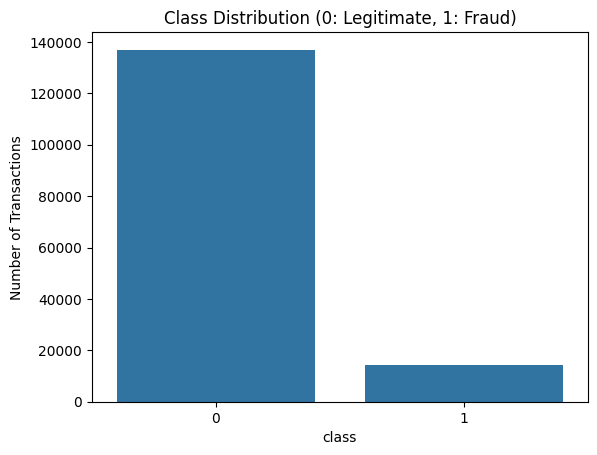

In [3]:
# Class Distribution Analysis [cite: 120]
fraud_counts = fraud_df['class'].value_counts()
print(f"Class Distribution:\n{fraud_counts}")
print(f"Fraud Percentage: {round(fraud_counts[1]/len(fraud_df)*100, 2)}%")

sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

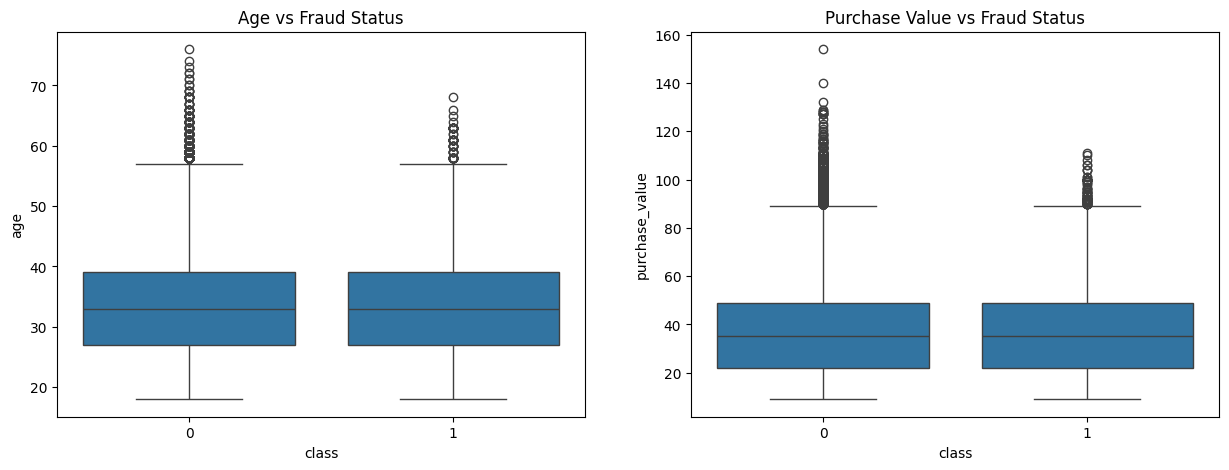

In [4]:
# Bivariate Analysis: Is fraud more common in specific age groups or values? 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age vs Class
sns.boxplot(x='class', y='age', data=fraud_df, ax=axes[0])
axes[0].set_title('Age vs Fraud Status')

# Purchase Value vs Class
sns.boxplot(x='class', y='purchase_value', data=fraud_df, ax=axes[1])
axes[1].set_title('Purchase Value vs Fraud Status')

plt.show()

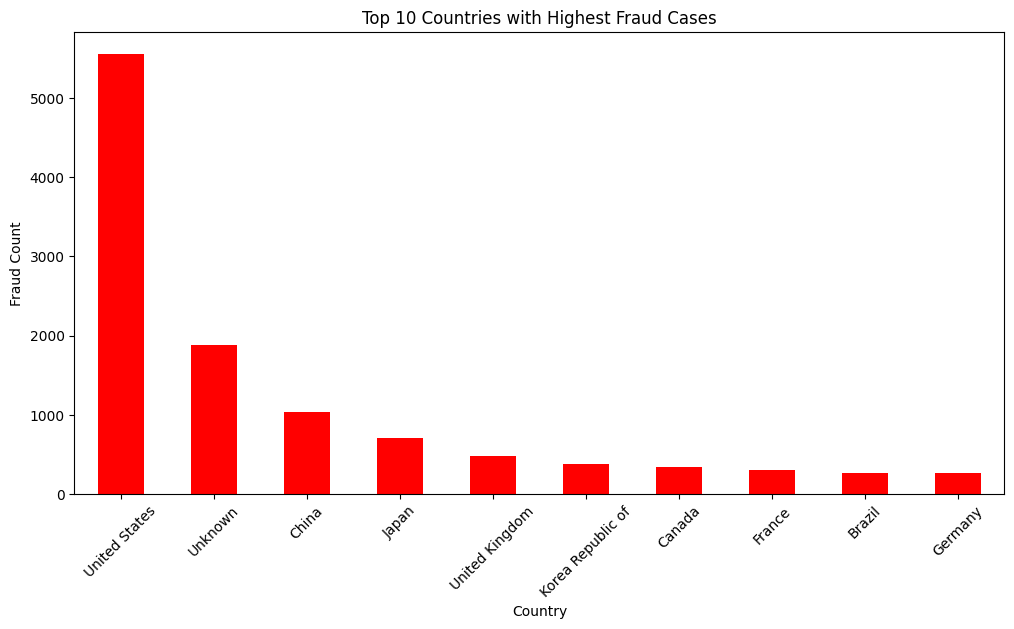

In [5]:
# Top 10 Countries by Fraud Count 
fraud_by_country = fraud_df[fraud_df['class'] == 1].groupby('country').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
fraud_by_country.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Highest Fraud Cases')
plt.xlabel('Country')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.show()

# Save this version to processed data for the next notebook 
fraud_df.to_csv('../data/processed/fraud_data_with_geo.csv', index=False)